In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import itertools
import math

C:\Users\Acer\AppData\Local\Temp\ipykernel_14848\1608969665.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
training_data_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/Training dan Testing/Gabungan_Training_Data_40 C_Turnigy.csv'

training_data = pd.read_csv(training_data_path)

# Split features and target variable for training
X_train = training_data[['Voltage', 'Current', 'Temperature']]
y_train = training_data['SOC']

X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))

In [4]:
testing_data_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/Training dan Testing/Testing_HWFET_40 Deg.csv'
testing_data = pd.read_csv(testing_data_path)

# Split features and target variable
X_test = testing_data[['Voltage', 'Current', 'Temperature']]
y_test = testing_data['SOC']

# Reshape input data to fit LSTM model requirements [samples, timesteps, features]
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

In [5]:
param_dist = {
    'units': [10, 20, 30, 32, 40, 50, 60, 64, 70, 128],
    'batch_size': [32, 64, 128]
}

all_params = [dict(zip(param_dist.keys(), values)) for values in itertools.product(*param_dist.values())]

best_score = float('inf')  
best_params = None

for params in all_params:
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2, restore_best_weights=True)
    
    model = Sequential([
        LSTM(units=params['units'], activation='tanh', return_sequences=True),  
        LSTM(units=params['units'], activation='tanh'),    
        Dense(units=1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=100, batch_size=params['batch_size'], verbose=2, validation_split=0.2, callbacks=[early_stopping])
    
    y_pred = model.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Params: {params}, RMSE: {rmse}")  # Menampilkan RMSE setelah pelatihan
    
    if rmse < best_score:
        best_score = rmse
        best_params = params

print("Parameter terbaik: ", best_params)
print("RMSE terbaik pada data pengujian: ", best_score)

Epoch 1/100
2337/2337 - 10s - 4ms/step - loss: 2457.8931 - val_loss: 1197.2792
Epoch 2/100
2337/2337 - 9s - 4ms/step - loss: 1270.1758 - val_loss: 650.7967
Epoch 3/100
2337/2337 - 7s - 3ms/step - loss: 813.3242 - val_loss: 554.3085
Epoch 4/100
2337/2337 - 5s - 2ms/step - loss: 539.9263 - val_loss: 112.7135
Epoch 5/100
2337/2337 - 5s - 2ms/step - loss: 97.4198 - val_loss: 28.6651
Epoch 6/100
2337/2337 - 5s - 2ms/step - loss: 21.7804 - val_loss: 9.2340
Epoch 7/100
2337/2337 - 5s - 2ms/step - loss: 5.0879 - val_loss: 3.7749
Epoch 8/100
2337/2337 - 5s - 2ms/step - loss: 1.9865 - val_loss: 3.5661
Epoch 9/100
2337/2337 - 5s - 2ms/step - loss: 1.5694 - val_loss: 2.5742
Epoch 10/100
2337/2337 - 5s - 2ms/step - loss: 1.4771 - val_loss: 2.6814
Epoch 11/100
2337/2337 - 5s - 2ms/step - loss: 1.4455 - val_loss: 2.8666
Epoch 12/100
2337/2337 - 5s - 2ms/step - loss: 1.4364 - val_loss: 2.3557
Epoch 13/100
2337/2337 - 5s - 2ms/step - loss: 1.4340 - val_loss: 2.9236
Epoch 14/100
2337/2337 - 5s - 2ms/ste

In [6]:
model = Sequential([
    LSTM(units=64, activation='tanh', return_sequences=True),  
    LSTM(units=64, activation='tanh'),    
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [7]:
history = model.fit(X_train, y_train, epochs=100, 
                    batch_size=128, validation_split=0.2, 
                    callbacks=[early_stopping])

model.summary()

Epoch 1/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 2690.7468 - val_loss: 648.4769
Epoch 2/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 852.3911 - val_loss: 554.6825
Epoch 3/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 639.7198 - val_loss: 119.3764
Epoch 4/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 131.5478 - val_loss: 27.6165
Epoch 5/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 31.4747 - val_loss: 12.7592
Epoch 6/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 12.3602 - val_loss: 7.4478
Epoch 7/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 5.6749 - val_loss: 4.7967
Epoch 8/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.1943 - val_loss: 3.7576
Epoch 9/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 2.2401 - val_loss: 4.0001
Epoch 10/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.8029 - val_loss: 3.3021
Epoch 11/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.6078 - val_loss: 2.6535
Epoch 12/100
585/585

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                  │ (None, 1, 64)          │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,493 (591.77 KB)

 Trainable params: 50,497 (197.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,996 (394.52 KB)

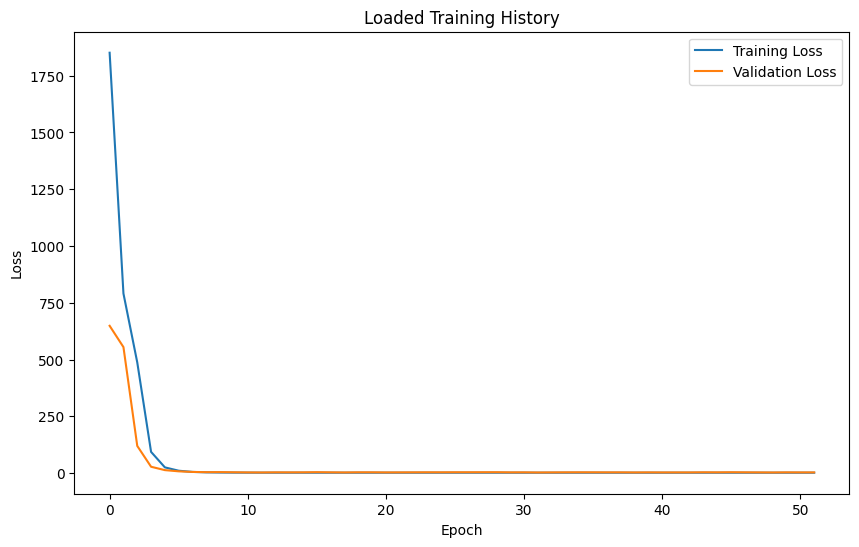

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loaded Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Simpan Model
model_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/hasil model/lstm_40 C_model terbaik.h5'
model.save(model_path)
print(f"Model saved successfully at '{model_path}'")

# Simpan Riwayat Pelatihan
history_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/hasil model/training_history model terbaik_lstm_40 C.csv'
pd.DataFrame(history.history).to_csv(history_path, index=False)
print(f"Training history saved successfully at '{history_path}'")

Model saved successfully at 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/hasil model/lstm_40 C_model terbaik.h5'
Training history saved successfully at 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/hasil model/training_history model terbaik_lstm_40 C.csv'


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0608
Testing Loss: 1.4723817110061646
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.8986492631014064
Root Mean Squared Error (RMSE): 1.213417085894115
R-squared: 0.998258804237216


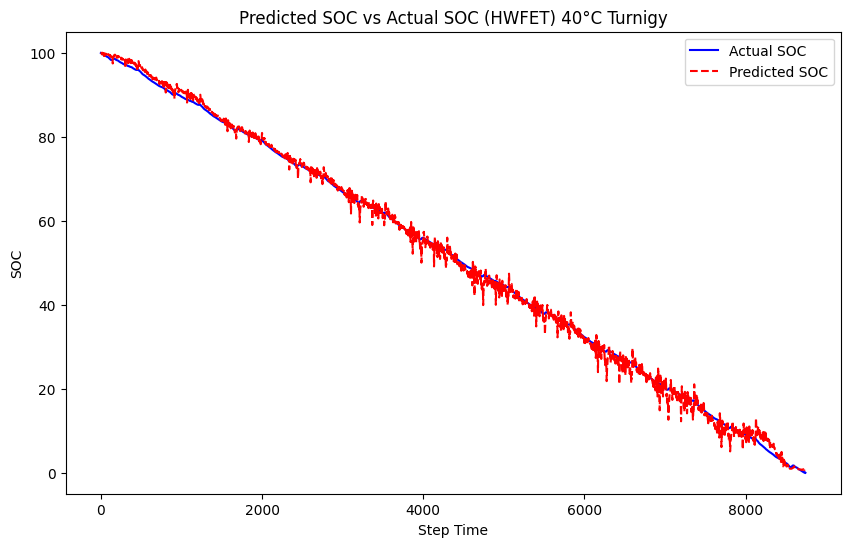

In [10]:
loss = model.evaluate(X_test, y_test)
print(f'Testing Loss: {loss}')

# Predict SOC with model
y_pred = model.predict(X_test)

# Calculate MAE, RMSE, and R-squared for testing data with model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted SOC along with R-squared
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual SOC', color='blue', linestyle='-')
plt.plot(y_pred, label='Predicted SOC', color='red', linestyle='--')
plt.title('Predicted SOC vs Actual SOC (HWFET) 40°C Turnigy')
plt.xlabel('Step Time')
plt.ylabel('SOC')
plt.legend()
plt.show()